In [1]:
import sys

sys.path.append(
    "/Users/varunpathak/Documents/personal_projects/kaggle_data_projects/housing_prices/"
)

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from data import gatherData, processData
from feature import EngineerData
import utils
from model import modelTraining

In [3]:
config = utils.load_config_file(file_location="config.yaml")

## Gathering data

In [4]:
gather_data = gatherData(data_folder=config.get("DATA_FOLDER"))

train_data = gather_data.load_data(file_name=config.get("TRAIN_DATA_FILE_NAME"))
test_data = gather_data.load_data(file_name=config.get("TEST_DATA_FILE_NAME"))

In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Process Data

In [8]:
process_data = processData(config=config)

train_data_selected_columns = process_data.select_specific_columns(data_df=train_data)

train_data_selected_columns

,MSSubClass,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,60,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,...,61,0,0,0,0,7,5,2003,2003,208500
1,20,RL,Pave,Lvl,AllPub,Veenker,1Fam,1Story,MetalSd,MetalSd,...,0,0,0,0,0,6,8,1976,1976,181500
2,60,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,...,42,0,0,0,0,7,5,2001,2002,223500
3,70,RL,Pave,Lvl,AllPub,Crawfor,1Fam,2Story,Wd Sdng,Wd Shng,...,35,272,0,0,0,7,5,1915,1970,140000
4,60,RL,Pave,Lvl,AllPub,NoRidge,1Fam,2Story,VinylSd,VinylSd,...,84,0,0,0,0,8,5,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Lvl,AllPub,Gilbert,1Fam,2Story,VinylSd,VinylSd,...,40,0,0,0,0,6,5,1999,2000,175000
1456,20,RL,Pave,Lvl,AllPub,NWAmes,1Fam,1Story,Plywood,Plywood,...,0,0,0,0,0,6,6,1978,1988,210000
1457,70,RL,Pave,Lvl,AllPub,Crawfor,1Fam,2Story,CemntBd,CmentBd,...,60,0,0,0,0,7,9,1941,2006,266500
1458,20,RL,Pave,Lvl,AllPub,NAmes,1Fam,1Story,MetalSd,MetalSd,...,0,112,0,0,0,5,6,1950,1996,142125


In [9]:
train_data_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   Exterior2nd    1460 non-null   object
 10  BsmtFinType1   1423 non-null   object
 11  Heating        1460 non-null   object
 12  CentralAir     1460 non-null   object
 13  Electrical     1459 non-null   object
 14  Functional     1460 non-null   object
 15  GarageType     1379 non-null   object
 16  PavedDrive     1460 non-null   object
 17  MiscFeature    54 non-null     object
 18  SaleType       1460 non-null

In [10]:
train_data_selected_columns = process_data.perform_data_processing(data_df=train_data)

In [11]:
train_data_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1459 non-null   category
 1   MSZoning       1459 non-null   category
 2   Street         1459 non-null   category
 3   LandContour    1459 non-null   category
 4   Utilities      1459 non-null   category
 5   Neighborhood   1459 non-null   category
 6   BldgType       1459 non-null   category
 7   HouseStyle     1459 non-null   category
 8   Exterior1st    1459 non-null   category
 9   Exterior2nd    1459 non-null   category
 10  BsmtFinType1   1459 non-null   category
 11  Heating        1459 non-null   category
 12  CentralAir     1459 non-null   category
 13  Electrical     1459 non-null   category
 14  Functional     1459 non-null   category
 15  GarageType     1459 non-null   category
 16  PavedDrive     1459 non-null   category
 17  MiscFeature    1459 non-null   ca

In [12]:
print(f"any nans in the data: {train_data_selected_columns.isna().any().any()}")

any nans in the data: False


In [13]:
train_data_selected_columns["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    175000
1455    210000
1456    266500
1457    142125
1458    147500
Name: SalePrice, Length: 1459, dtype: int64

## Data Analysis
1. distribution of MSSubclass <br>
    1.1. MSSubclass vs sales price
2. MSzoning vs sales pice <br>
    2.1. distribution of the mszonig
3. Lot Area vs Sales price
4. box plot for sales price <br>
    4.1 histogram for the sales price
5. correlation plot - numerical columns

In [14]:
fig = go.Figure()

fig.add_trace(
    go.Box(
        x=train_data_selected_columns["MSSubClass"],
        y=train_data_selected_columns["SalePrice"],
        name="MSSubclass",
    )
)

fig.update_layout(
    title="MSSubclass vs sales price",
    xaxis_title="Subclasses",
    yaxis_title="Sales price",
)

fig.show()

In [15]:
fig = go.Figure()
fig.add_trace(
    go.Box(
        x=train_data_selected_columns["MSZoning"],
        y=train_data_selected_columns["SalePrice"],
        name="MSZoning",
    )
)

fig.update_layout(
    title="Zones vs sales price",
    xaxis_title="Zones",
    yaxis_title="Sales price",
)
fig.show()

In [16]:
df_subclass_count = (
    train_data_selected_columns["MSSubClass"].value_counts().reset_index()
)

In [17]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_subclass_count["MSSubClass"],
        y=df_subclass_count["count"],
        name="MS Subclass count distribution",
    )
)

fig.update_layout(
    title="Count of each Subclass", xaxis_title="Sub class", yaxis_title="Count"
)

fig.show()

In [18]:
df_zone_count = train_data_selected_columns["MSZoning"].value_counts().reset_index()

In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_zone_count["MSZoning"], y=df_zone_count["count"]))

fig.update_layout(
    title="Count of each Zone", xaxis_title="zone type", yaxis_title="Count"
)

In [20]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=train_data_selected_columns["LotArea"],
        y=train_data_selected_columns["SalePrice"],
        mode="markers",
        name="Lot Area",
    )
)

fig.update_layout(
    title="Lot Area vs salesprice",
    xaxis_title="Lot Area (sqft)",
    yaxis_title="Sales price (USD)",
)

In [21]:
fig = px.scatter(
    data_frame=train_data_selected_columns,
    x="LotArea",
    y="SalePrice",
    color="MSSubClass",
)

fig.update_layout(title="Area vs Sales price by Subclass")

fig.show()

In [22]:
pd.options.display.max_columns = None
train_data_selected_columns[train_data_selected_columns["LotArea"] > 115000]

,MSSubClass,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageCond,GarageQual,LotArea,TotalBsmtSF,FullBath,HalfBath,KitchenAbvGr,BedroomAbvGr,Fireplaces,TotRmsAbvGrd,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
249,50,RL,Pave,Low,AllPub,ClearCr,1Fam,1.5Fin,Wd Sdng,HdBoard,Rec,GasA,Y,SBrkr,Typ,Attchd,Y,Shed,WD,Normal,Gd,TA,Gd,TA,Gd,Gd,TA,TA,159000,1444,2,0,1,4,2,7,2,0,98,0,0,0,0,6,7,1958,2006,277000
313,20,RL,Pave,Low,AllPub,Timber,1Fam,1Story,BrkFace,BrkFace,ALQ,GasW,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,TA,TA,Gd,TA,TA,TA,TA,TA,215245,2136,2,0,1,3,2,8,2,0,0,0,0,0,0,7,5,1965,1965,375000
335,190,RL,Grvl,HLS,AllPub,Timber,2fmCon,1.5Fin,Plywood,Plywood,ALQ,GasA,Y,SBrkr,Typ,Attchd,Y,Shed,WD,Normal,TA,TA,TA,TA,Ex,TA,TA,TA,164660,1499,2,0,1,3,2,7,2,670,0,0,0,0,0,5,6,1965,1965,228950
706,20,RL,Pave,Low,AllPub,ClearCr,1Fam,1Story,Plywood,Plywood,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,TA,TA,Gd,TA,TA,Gd,TA,TA,115149,1643,2,0,1,2,2,5,2,380,48,0,0,0,0,7,5,1971,2002,302000


In [23]:
for column in config.get("NUMERICAL_COLUMNS"):

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=train_data_selected_columns[column],
            y=train_data_selected_columns["SalePrice"],
            mode="markers",
            name="Lot Area",
        )
    )

    fig.update_layout(
        title=f"{column} vs salesprice",
        xaxis_title=column,
        yaxis_title="Sales price (USD)",
        height=500,
        width=750,
    )

    fig.show()

In [24]:
hist_data = [train_data_selected_columns["SalePrice"]]
group_names = ["Sale Prices (USD)"]

fig = ff.create_distplot(
    hist_data=hist_data,
    group_labels=group_names,
    show_rug=False,
    show_curve=True,
    show_hist=False,
)

fig.show()

In [25]:
train_data_selected_columns[train_data_selected_columns["SalePrice"] > 700000]

,MSSubClass,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageCond,GarageQual,LotArea,TotalBsmtSF,FullBath,HalfBath,KitchenAbvGr,BedroomAbvGr,Fireplaces,TotRmsAbvGrd,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
691,60,RL,Pave,Lvl,AllPub,NoRidge,1Fam,2Story,HdBoard,HdBoard,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,Ex,TA,Ex,TA,Ex,Ex,TA,TA,21535,2444,3,1,1,4,2,10,3,382,50,0,0,0,0,10,6,1994,1995,755000
1182,60,RL,Pave,Lvl,AllPub,NoRidge,1Fam,2Story,Wd Sdng,ImStucc,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Abnorml,Gd,TA,Ex,TA,Ex,Ex,TA,TA,15623,2396,3,1,1,4,2,10,3,171,78,0,0,0,555,10,5,1996,1996,745000


In [26]:
train_data_without_outlier = process_data.remove_outliers(
    data_df=train_data_selected_columns
)

train_data_without_outlier = train_data_without_outlier.reset_index(drop=True)

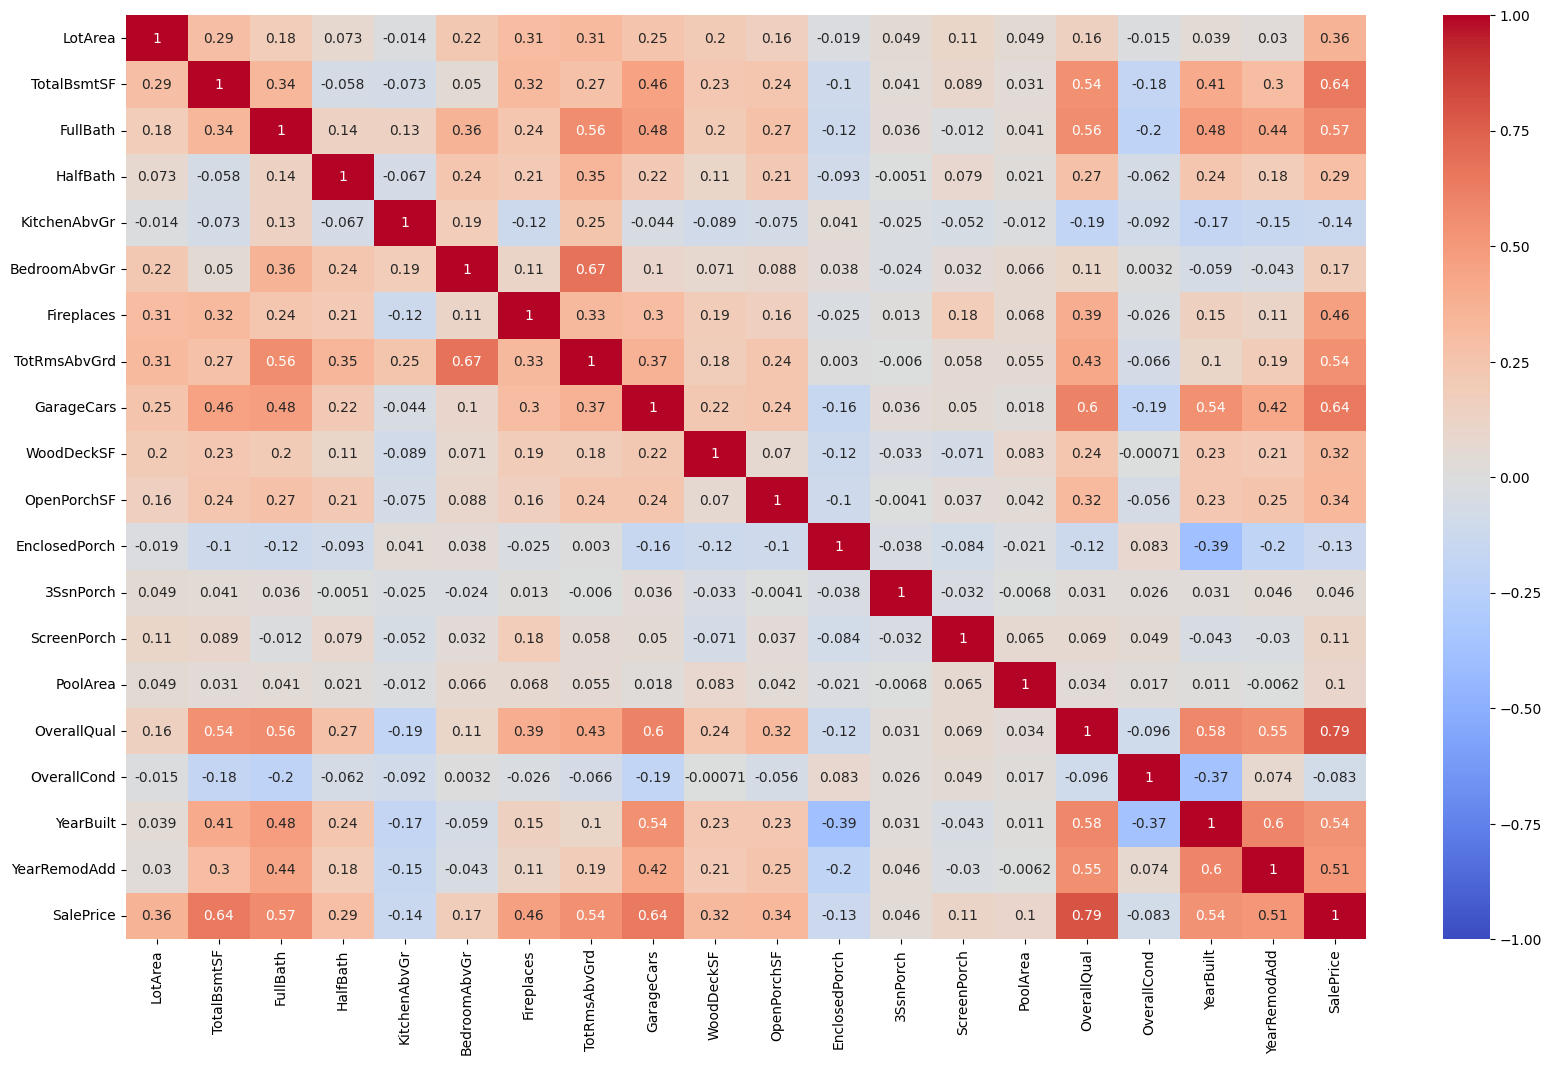

In [27]:
corr_matrix = train_data_without_outlier.corr(numeric_only=True)

plt.figure(figsize=(20, 12))

sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", vmax=1, vmin=-1)

plt.show()

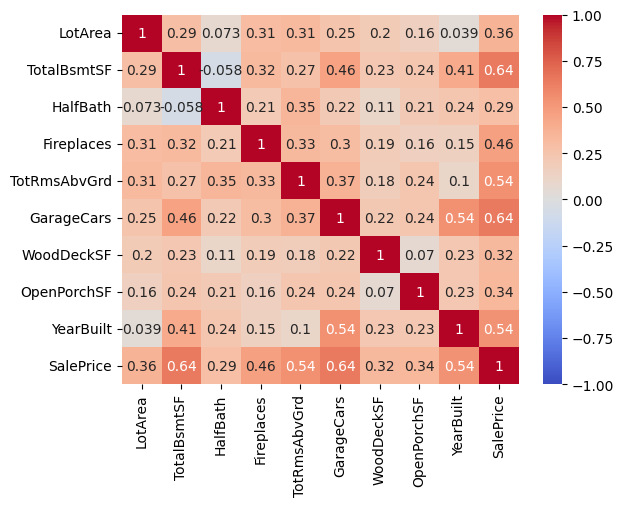

In [28]:
high_corr_columns_list = config.get("HIGH_CORRELATED_COLUMN") + ["SalePrice"]

corr_matrix_high_corr_cols = train_data_without_outlier[high_corr_columns_list].corr()

plt.Figure(figsize=(20, 12))

sns.heatmap(
    data=corr_matrix_high_corr_cols, annot=True, cmap="coolwarm", vmax=1, vmin=-1
)

plt.show()

In [29]:
config.get("HIGH_CORRELATED_COLUMN")

['LotArea',
 'TotalBsmtSF',
 'HalfBath',
 'Fireplaces',
 'TotRmsAbvGrd',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'YearBuilt']

In [30]:
train_data_without_outlier

,MSSubClass,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageCond,GarageQual,LotArea,TotalBsmtSF,FullBath,HalfBath,KitchenAbvGr,BedroomAbvGr,Fireplaces,TotRmsAbvGrd,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,60,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,Gd,TA,Gd,TA,Ex,Gd,TA,TA,8450,856,2,1,1,3,0,8,2,0,61,0,0,0,0,7,5,2003,2003,208500
1,20,RL,Pave,Lvl,AllPub,Veenker,1Fam,1Story,MetalSd,MetalSd,ALQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,TA,TA,Gd,TA,Ex,TA,TA,TA,9600,1262,2,0,1,3,1,6,2,298,0,0,0,0,0,6,8,1976,1976,181500
2,60,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,Gd,TA,Gd,TA,Ex,Gd,TA,TA,11250,920,2,1,1,3,1,6,2,0,42,0,0,0,0,7,5,2001,2002,223500
3,70,RL,Pave,Lvl,AllPub,Crawfor,1Fam,2Story,Wd Sdng,Wd Shng,ALQ,GasA,Y,SBrkr,Typ,Detchd,Y,NA,WD,Abnorml,TA,TA,TA,Gd,Gd,Gd,TA,TA,9550,756,1,0,1,3,1,7,3,0,35,272,0,0,0,7,5,1915,1970,140000
4,60,RL,Pave,Lvl,AllPub,NoRidge,1Fam,2Story,VinylSd,VinylSd,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,Gd,TA,Gd,TA,Ex,Gd,TA,TA,14260,1145,2,1,1,4,1,9,3,192,84,0,0,0,0,8,5,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,60,RL,Pave,Lvl,AllPub,Gilbert,1Fam,2Story,VinylSd,VinylSd,Unf,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal,TA,TA,Gd,TA,Ex,TA,TA,TA,7917,953,2,1,1,3,1,7,2,0,40,0,0,0,0,6,5,1999,2000,175000
1444,20,RL,Pave,Lvl,AllPub,NWAmes,1Fam,1Story,Plywood,Plywood,ALQ,GasA,Y,SBrkr,Min1,Attchd,Y,NA,WD,Normal,TA,TA,Gd,TA,TA,TA,TA,TA,13175,1542,2,0,1,3,2,7,2,349,0,0,0,0,0,6,6,1978,1988,210000
1445,70,RL,Pave,Lvl,AllPub,Crawfor,1Fam,2Story,CemntBd,CmentBd,GLQ,GasA,Y,SBrkr,Typ,Attchd,Y,Shed,WD,Normal,Ex,Gd,TA,Gd,Ex,Gd,TA,TA,9042,1152,2,0,1,4,2,9,1,0,60,0,0,0,0,7,9,1941,2006,266500
1446,20,RL,Pave,Lvl,AllPub,NAmes,1Fam,1Story,MetalSd,MetalSd,GLQ,GasA,Y,FuseA,Typ,Attchd,Y,NA,WD,Normal,TA,TA,TA,TA,Gd,Gd,TA,TA,9717,1078,1,0,1,2,0,5,1,366,0,112,0,0,0,5,6,1950,1996,142125


## Feature engineering 
- one hot encode categorical columns
- label encode the categorical columns

In [31]:
eng_data = EngineerData(config=config)


engineered_data = eng_data.perform_feature_eng(data_df=train_data_without_outlier)

/Users/varunpathak/Documents/personal_projects/kaggle_data_projects/housing_prices/feature.py:43: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/varunpathak/Documents/personal_projects/kaggle_data_projects/housing_prices/feature.py:43: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [32]:
x_train, x_test, y_train, y_test = eng_data.split_data(data_df=engineered_data)

## Training

In [33]:
train_model = modelTraining(config=config)
rmse, mae = train_model.model_train_evaluate(
    modelname="randomforest",
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
)

print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 0.013140664034490978, MAE: 0.11750596576780654


## Tuning

In [34]:
rmse, mae = train_model.model_train_evaluate(
    modelname="randomforest",
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    tune=True
)

print(f"RMSE: {rmse}, MAE: {mae}")

Best params: {'max_depth': 20, 'n_estimators': 500}
RMSE: 0.01319143641230354, MAE: 0.11831415782878435
